In [1]:
import matplotlib.pyplot as plt

from dataset.dataset import get_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [2]:
nlp = spacy.load("pt_core_news_lg")

In [3]:
def load_dataset(): 
    dataset = get_dataset()
    extractions = {}
    i = 0
    split = 0
    while split<=1:
        for triple in dataset[split]:
            sent = triple.phrase
            sent_counter = 0
            for token in nlp(sent):
                sent_counter += 1
                
            ext = triple.gold_extractions[0]
            merged = ext.arg0 + " " + ext.rel + " " + ext.arg1
            ext_counter = 0
            for token in nlp(merged):
                ext_counter += 1
                
            ext = {"length" : ext_counter,
                   "merged": merged,
                   "splited" : {
                       "arg0" : ext.arg0,
                       "rel" : ext.rel,
                       "arg1" : ext.arg1
                        }
                   }
            extractions[i] = {"sent" : {"sent" : sent,
                                        "length" : sent_counter
                                        },
                              "ext" : ext}
            i+=1
        split+=1
    return extractions

In [4]:
dataset = load_dataset()
dataset[0]

processando TA_dev: 100%|██████████| 927/927 [00:04<00:00, 192.89it/s]


{'sent': {'sent': 'Drew Barrymore é sobrinha de Diana Barrymore .',
  'length': 8},
 'ext': {'length': 7,
  'merged': 'Drew Barrymore é sobrinha de Diana Barrymore',
  'splited': {'arg0': 'Drew Barrymore',
   'rel': 'é sobrinha de',
   'arg1': 'Diana Barrymore'}}}

In [12]:
same_string_extractions = {}
minimum_extractions = {}
small_extractions = {}
long_extractions = {}
small_sentences = {}

long_sentences = {}
long_sentece_small_extractions = {}

for key in dataset:
    inst = dataset[key]
    sent_len = inst["sent"]["length"]
    ext_len = inst["ext"]["length"]
    if sent_len-1 == ext_len or sent_len == ext_len:
        same_string_extractions[key] = inst
    if ext_len > 8:
        long_extractions[key] = inst
    if ext_len == 3:
        minimum_extractions[key] = inst
    if sent_len < 15:
        small_sentences[key] = inst
    if ext_len > 3 and ext_len <=8:
        small_extractions[key] = inst
    

In [ ]:
small_extractions

In [13]:
print("extractions with same sentence length: ",len(same_string_extractions))
print("extractions with one tag on arg0, one on rel and one on arg1: ", len(minimum_extractions))
print("small extractions, token counter <= 8: ", len(small_extractions))
print("long extractions, token counter > 8: ", len(long_extractions))

extractions with same sentence length:  13188
extractions with one tag on arg0, one on rel and one on arg1:  760
small extractions, token counter <= 6:  30897
long extractions, token counter > 6:  49680


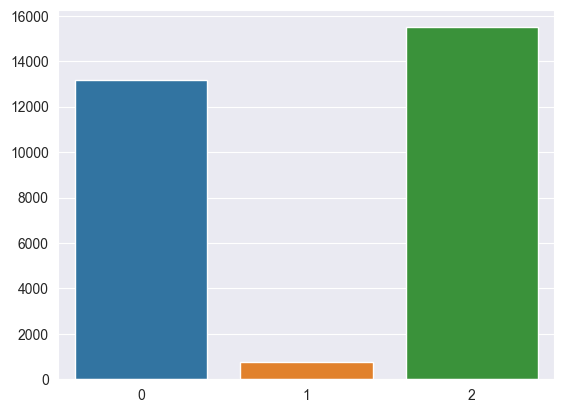

In [7]:
import seaborn as sns
y = [len(same_string_extractions), len(minimum_extractions), len(small_extractions)]
bar = sns.barplot(x = [0,1,2],y=y)